In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_salary = pd.read_csv("Salary_data.csv")

In [3]:
data_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data2 = data_salary.rename({'YearsExperience':'YOE'},axis = 1)

In [5]:
data2

,YOE,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
data2.describe()

,YOE,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
# checking for outliers

<AxesSubplot:xlabel='Salary'>

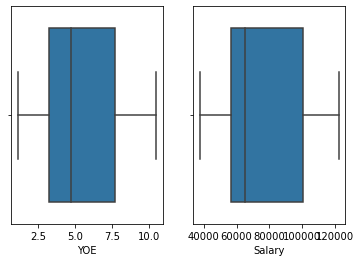

In [7]:
plt.subplot(121)
sns.boxplot(data2['YOE'])
plt.subplot(122)
sns.boxplot(data2['Salary'])

In [ ]:
# checking for null values

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YOE     30 non-null     float64
 1   Salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
#checking for duplicates

In [15]:
data2.duplicated().value_counts()

False    30
dtype: int64

In [ ]:
# Correlation matrix

In [16]:
data2.corr()

,YOE,Salary
YOE,1.000000,0.978242
Salary,0.978242,1.000000


In [17]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# checking normality

<AxesSubplot:xlabel='YOE', ylabel='Density'>

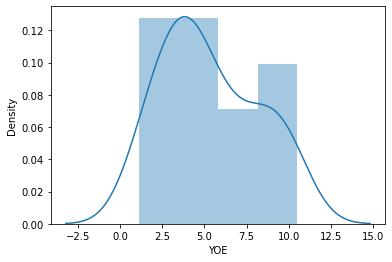

In [18]:
sns.distplot(data2['YOE'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

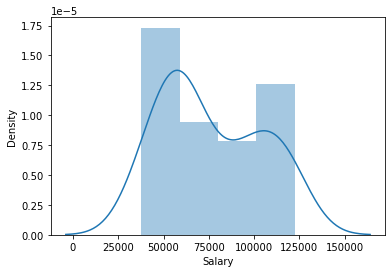

In [19]:
sns.distplot(data2['Salary'])

In [9]:
model = smf.ols('Salary~YOE',data=data2).fit()

<AxesSubplot:xlabel='YOE', ylabel='Salary'>

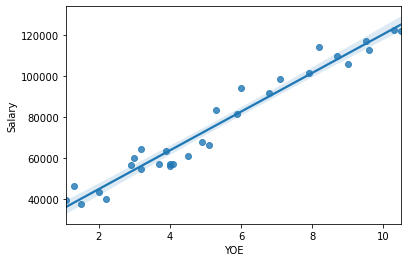

In [10]:
sns.regplot(x='YOE',y='Salary',data=data2)

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.14e-20
Time:                        13:45:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YOE         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.predict(data2)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

ERROR! Session/line number was not unique in database. History logging moved to new session 102


In [ ]:
# Predictions for new data points

In [26]:
new_data = pd.Series([10,12,9])

In [34]:
y_pred = pd.DataFrame(new_data,columns=['YOE'])

In [35]:
model.predict(y_pred)

0    120291.823413
1    139191.748056
2    110841.861092
dtype: float64

In [ ]:
# Applying transformations on data variables

In [16]:
model1 = smf.ols('np.sqrt(Salary)~(YOE)',data=data2).fit()

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           9.78e-20
Time:                        16:53:15   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.7002      4.446     40.646      0.000     171.594     189.807
YOE           17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model1.predict(y_pred)

0    351.265542
1    385.378606
2    334.209010
dtype: float64

In [20]:
model2 = smf.ols('np.log(Salary)~(YOE)',data=data2).fit()

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           7.03e-18
Time:                        16:55:40   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
YOE            0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model2.predict(y_pred)

0    11.761931
1    12.012837
2    11.636478
dtype: float64

In [23]:
model3 = smf.ols('np.reciprocal(Salary)~(YOE)',data=data2).fit()

In [24]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.reciprocal(Salary)   R-squared:                       0.861
Model:                               OLS   Adj. R-squared:                  0.856
Method:                    Least Squares   F-statistic:                     173.2
Date:                   Sun, 11 Jul 2021   Prob (F-statistic):           1.63e-13
Time:                           17:00:22   Log-Likelihood:                 350.83
No. Observations:                     30   AIC:                            -697.7
Df Residuals:                         28   BIC:                            -694.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.454e-05    8.2e-07     29.913      0.000    2.29e-05    2.62e-05
YOE        -1.799e-06   1.37e-07    -13.162      0.000   -2.08e-06   -1.52e-06
==============================================================================
Omnibus:                        1.760   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.380
Skew:                           0.516   Prob(JB):                        0.502
Kurtosis:                       2.802   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model3.predict(y_pred)

0    0.000007
1    0.000003
2    0.000008
dtype: float64